In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
neo_data = pd.read_csv('neo_data_year.csv')

In [3]:
neo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7071 entries, 0 to 7070
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                7071 non-null   object 
 1   ID                                  7071 non-null   int64  
 2   Name                                7071 non-null   object 
 3   Neo Reference ID                    7071 non-null   int64  
 4   NASA JPL URL                        7071 non-null   object 
 5   Absolute Magnitude H                7070 non-null   float64
 6   Estimated Diameter Min (km)         7070 non-null   float64
 7   Estimated Diameter Max (km)         7070 non-null   float64
 8   Is Potentially Hazardous Asteroid   7071 non-null   bool   
 9   Close Approach Date Full            7071 non-null   object 
 10  Relative Velocity (km/h)            7071 non-null   float64
 11  Miss Distance (astronomical units)  7071 no

In [4]:
neo_data.describe()

,ID,Neo Reference ID,Absolute Magnitude H,Estimated Diameter Min (km),Estimated Diameter Max (km),Relative Velocity (km/h),Miss Distance (astronomical units),Miss Distance (kilometers)
count,7.071000e+03,7.071000e+03,7070.000000,7070.000000,7070.000000,7071.000000,7071.000000,7.071000e+03
mean,3.507760e+07,3.507760e+07,24.110185,0.094216,0.210672,45591.048594,0.210254,3.145349e+07
std,2.469578e+07,2.469578e+07,2.750369,0.176967,0.395711,24604.222974,0.156236,2.337262e+07
min,2.001685e+06,2.001685e+06,14.320000,0.000818,0.001828,1198.066272,0.000069,1.036104e+04
25%,3.763625e+06,3.763625e+06,22.250000,0.016016,0.035813,27324.221127,0.056744,8.488803e+06
50%,5.427624e+07,5.427624e+07,24.360000,0.035691,0.079807,40897.701799,0.196493,2.939494e+07
75%,5.437796e+07,5.437796e+07,26.100000,0.094309,0.210882,59606.122283,0.346463,5.183015e+07
max,5.442508e+07,5.442508e+07,32.560000,3.635423,8.129053,164976.500065,0.499906,7.478480e+07


In [5]:
# Since only one in 3 columns is missing so impute them with mean
neo_data_filled = neo_data.fillna({
    'Absolute Magnitude H': neo_data['Absolute Magnitude H'].mean(),
    'Estimated Diameter Min (km)': neo_data['Estimated Diameter Min (km)'].mean(),
    'Estimated Diameter Max (km)': neo_data['Estimated Diameter Max (km)'].mean()
})
neo_data_filled.isnull().sum()

Date                                  0
ID                                    0
Name                                  0
Neo Reference ID                      0
NASA JPL URL                          0
Absolute Magnitude H                  0
Estimated Diameter Min (km)           0
Estimated Diameter Max (km)           0
Is Potentially Hazardous Asteroid     0
Close Approach Date Full              0
Relative Velocity (km/h)              0
Miss Distance (astronomical units)    0
Miss Distance (kilometers)            0
Orbiting Body                         0
dtype: int64

In [6]:
# Making 'Date' and 'Close Approach Date Full' to datetime format
neo_data_filled['Date'] = pd.to_datetime(neo_data_filled['Date'])
neo_data_filled['Close Approach Date Full'] = pd.to_datetime(neo_data_filled['Close Approach Date Full'])

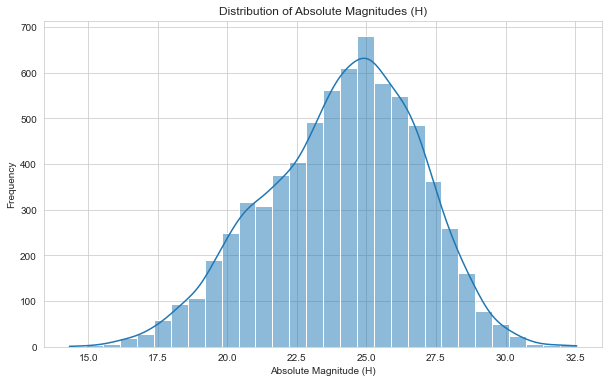

In [7]:
# Plot distribution of Absolute Magnitudes
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(neo_data_filled['Absolute Magnitude H'], bins=30, kde=True)
plt.title('Distribution of Absolute Magnitudes (H)')
plt.xlabel('Absolute Magnitude (H)')
plt.ylabel('Frequency')
plt.show()

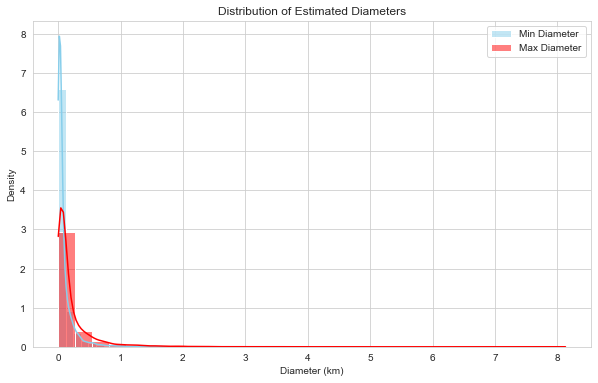

In [8]:
# Plot distribution of Estimated Diameter (Min and Max)
plt.figure(figsize=(10, 6))
sns.histplot(neo_data_filled['Estimated Diameter Min (km)'], color="skyblue", label='Min Diameter', kde=True, bins=30, stat="density", common_norm=False)
sns.histplot(neo_data_filled['Estimated Diameter Max (km)'], color="red", label='Max Diameter', kde=True, bins=30, stat="density", common_norm=False)
plt.title('Distribution of Estimated Diameters')
plt.xlabel('Diameter (km)')
plt.ylabel('Density')
plt.legend()
plt.show()

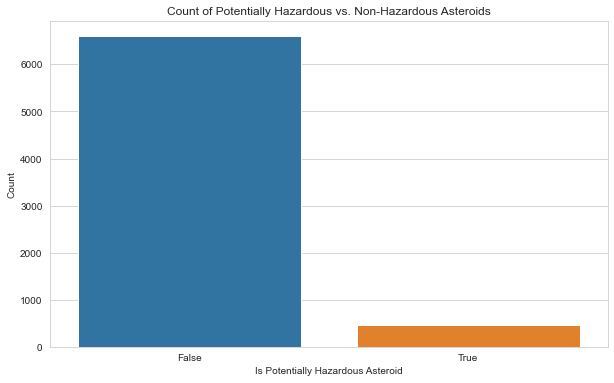

In [9]:
# Plot count of Potentially Hazardous vs. Non-Hazardous Asteroids
plt.figure(figsize=(10, 6))
sns.countplot(x=neo_data_filled['Is Potentially Hazardous Asteroid'])
plt.title('Count of Potentially Hazardous vs. Non-Hazardous Asteroids')
plt.xlabel('Is Potentially Hazardous Asteroid')
plt.ylabel('Count')
plt.show()

In [10]:
neo_data['Relative Velocity (km/h)'].describe()

count      7071.000000
mean      45591.048594
std       24604.222974
min        1198.066272
25%       27324.221127
50%       40897.701799
75%       59606.122283
max      164976.500065
Name: Relative Velocity (km/h), dtype: float64